<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.905893,27.272518,30.199591,-1.594208,162.783795,174.841012,-12.057218
1,0.0,1.0,22.377492,32.709164,26.616664,69.949865,161.653186,93.932285,67.720901
2,0.0,2.0,98.112411,37.436148,48.297779,16.779646,210.625982,205.094216,5.531767
3,0.0,3.0,39.638542,63.825785,48.703073,-414.256412,-252.089011,161.984697,-414.073708
4,0.0,4.0,99.295139,72.720767,73.747996,260.511257,516.275160,262.811683,253.463477
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.260831,87.859009,88.477557,-289.853867,-68.256470,192.347426,-260.603896
249996,999.0,246.0,96.974379,58.978352,56.117251,-129.849152,92.220830,246.769948,-154.549119
249997,999.0,247.0,35.934614,28.950670,67.742051,58.872679,201.500013,132.323050,69.176964
249998,999.0,248.0,78.990911,62.893437,91.266796,-113.644380,129.506764,261.353971,-131.847207


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.905893,27.272518,30.199591,-1.594208,162.783795,174.841012,-12.057218
1,0.0,1.0,22.377492,32.709164,26.616664,69.949865,161.653186,93.932285,67.720901
2,0.0,2.0,98.112411,37.436148,48.297779,16.779646,210.625982,205.094216,5.531767
3,0.0,3.0,39.638542,63.825785,48.703073,-414.256412,-252.089011,161.984697,-414.073708
4,0.0,4.0,99.295139,72.720767,73.747996,260.511257,516.275160,262.811683,253.463477
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.260831,87.859009,88.477557,-289.853867,-68.256470,192.347426,-260.603896
249996,999.0,246.0,96.974379,58.978352,56.117251,-129.849152,92.220830,246.769948,-154.549119
249997,999.0,247.0,35.934614,28.950670,67.742051,58.872679,201.500013,132.323050,69.176964
249998,999.0,248.0,78.990911,62.893437,91.266796,-113.644380,129.506764,261.353971,-131.847207


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    96.905893  27.272518  30.199591   -1.594208  162.783795   
      1.0    22.377492  32.709164  26.616664   69.949865  161.653186   
      2.0    98.112411  37.436148  48.297779   16.779646  210.625982   
      3.0    39.638542  63.825785  48.703073 -414.256412 -252.089011   
      4.0    99.295139  72.720767  73.747996  260.511257  516.275160   
...                ...        ...        ...         ...         ...   
999.0 245.0  35.260831  87.859009  88.477557 -289.853867  -68.256470   
      246.0  96.974379  58.978352  56.117251 -129.849152   92.220830   
      247.0  35.934614  28.950670  67.742051   58.872679  201.500013   
      248.0  78.990911  62.893437  91.266796 -113.644380  129.506764   
      249.0  28.763024  39.509997  80.402381  154.432824  313.108225   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    174.841012  -12.057218  
      1.0     93.932285   67.720901  
      2.0    205.094216    5.531767  
      3.0    161.984697 -414.073708  
      4.0    262.811683  253.463477  
...                 ...         ...  
999.0 245.0  192.347426 -260.603896  
      246.0  246.769948 -154.549119  
      247.0  132.323050   69.176964  
      248.0  261.353971 -131.847207  
      249.0  141.676168  171.432058  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    96.905893  27.272518  30.199591   -1.594208  162.783795   
      1.0    22.377492  32.709164  26.616664   69.949865  161.653186   
      2.0    98.112411  37.436148  48.297779   16.779646  210.625982   
      3.0    39.638542  63.825785  48.703073 -414.256412 -252.089011   
      4.0    99.295139  72.720767  73.747996  260.511257  516.275160   
...                ...        ...        ...         ...         ...   
999.0 245.0  35.260831  87.859009  88.477557 -289.853867  -68.256470   
      246.0  96.974379  58.978352  56.117251 -129.849152   92.220830   
      247.0  35.934614  28.950670  67.742051   58.872679  201.500013   
      248.0  78.990911  62.893437  91.266796 -113.644380  129.506764   
      249.0  28.763024  39.509997  80.402381  154.432824  313.108225   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    174.841012  -12.057218  
      1.0     93.932285   67.720901  
      2.0    205.094216    5.531767  
      3.0    161.984697 -414.073708  
      4.0    262.811683  253.463477  
...                 ...         ...  
999.0 245.0  192.347426 -260.603896  
      246.0  246.769948 -154.549119  
      247.0  132.323050   69.176964  
      248.0  261.353971 -131.847207  
      249.0  141.676168  171.432058  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.905893,27.272518,30.199591,-1.594208,162.783795,174.841012,-12.057218
1,0.0,1.0,22.377492,32.709164,26.616664,69.949865,161.653186,93.932285,67.720901
2,0.0,2.0,98.112411,37.436148,48.297779,16.779646,210.625982,205.094216,5.531767
3,0.0,3.0,39.638542,63.825785,48.703073,-414.256412,-252.089011,161.984697,-414.073708
4,0.0,4.0,99.295139,72.720767,73.747996,260.511257,516.275160,262.811683,253.463477
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.260831,87.859009,88.477557,-289.853867,-68.256470,192.347426,-260.603896
249996,999.0,246.0,96.974379,58.978352,56.117251,-129.849152,92.220830,246.769948,-154.549119
249997,999.0,247.0,35.934614,28.950670,67.742051,58.872679,201.500013,132.323050,69.176964
249998,999.0,248.0,78.990911,62.893437,91.266796,-113.644380,129.506764,261.353971,-131.847207


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    96.905893  27.272518  30.199591   -1.594208  162.783795   
      1.0    22.377492  32.709164  26.616664   69.949865  161.653186   
      2.0    98.112411  37.436148  48.297779   16.779646  210.625982   
      3.0    39.638542  63.825785  48.703073 -414.256412 -252.089011   
      4.0    99.295139  72.720767  73.747996  260.511257  516.275160   
...                ...        ...        ...         ...         ...   
999.0 245.0  35.260831  87.859009  88.477557 -289.853867  -68.256470   
      246.0  96.974379  58.978352  56.117251 -129.849152   92.220830   
      247.0  35.934614  28.950670  67.742051   58.872679  201.500013   
      248.0  78.990911  62.893437  91.266796 -113.644380  129.506764   
      249.0  28.763024  39.509997  80.402381  154.432824  313.108225   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    174.841012  -12.057218  
      1.0     93.932285   67.720901  
      2.0    205.094216    5.531767  
      3.0    161.984697 -414.073708  
      4.0    262.811683  253.463477  
...                 ...         ...  
999.0 245.0  192.347426 -260.603896  
      246.0  246.769948 -154.549119  
      247.0  132.323050   69.176964  
      248.0  261.353971 -131.847207  
      249.0  141.676168  171.432058  

[250000 rows x 7 columns]

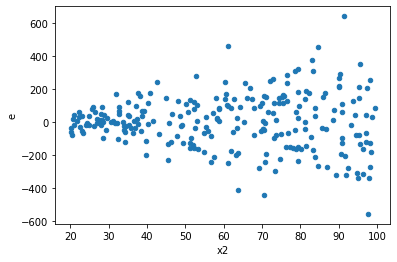

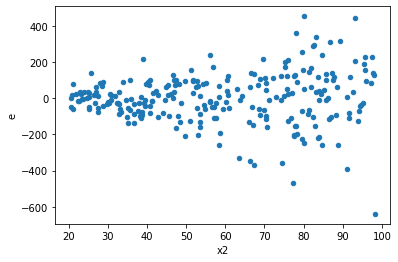

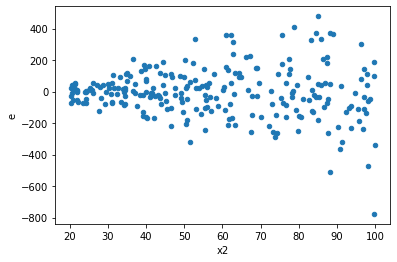

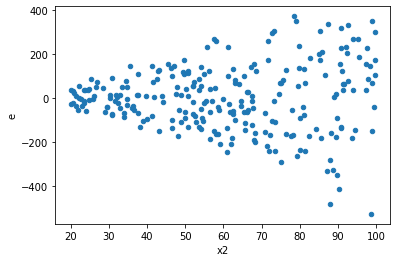

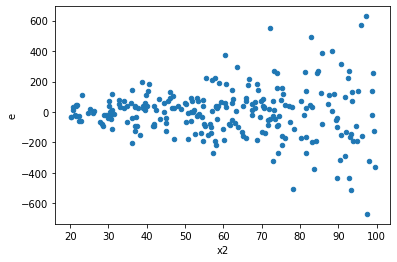

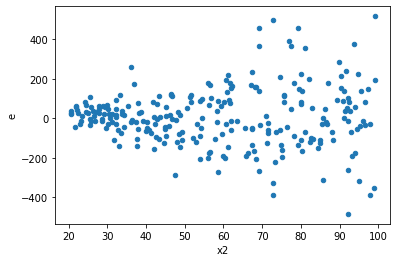

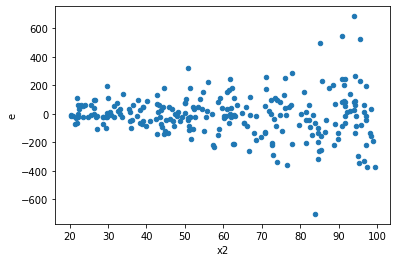

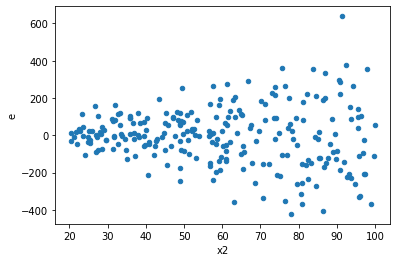

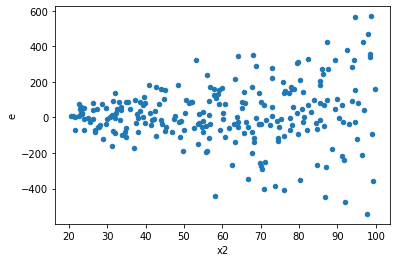

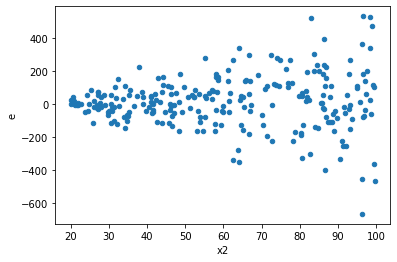

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,1903474.224958294,3018944.9491131417,19623.44561812674,31123.14380529012,1.5860182972423955,0.02409972511992864,0.9879501374400357,0.01204986255996432,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,792427.9904142176,2918573.4902740717,8169.360725919769,30088.386497670843,3.683077232984257,5.759253074444359e-10,0.9999999997120373,2.8796265372221796e-10,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,2280118.739351687,2289361.5734160803,23506.378756202957,23601.665705320414,1.004053663480272,0.9841468034148191,0.5079265982925905,0.49207340170740954,Reject005=1 : Homoscedasticity
3.0,97.0,97.0,1289274.0884701284,3137948.793949708,13291.485448145653,32349.987566491833,2.4338880475549183,1.7067569726414433e-05,0.9999914662151368,8.533784863207217e-06,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,2437722.0514177172,3383303.036006117,25131.155169254816,34879.4127423311,1.3878953238489489,0.10817659867135809,0.945911700664321,0.054088299335679046,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,858003.3371932174,3325479.5250214757,8845.395228796055,34283.29407238635,3.8758351871918157,1.3295919920608412e-10,0.9999999999335204,6.647959960304206e-11,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1916026.7070959287,2412373.7941534673,19752.85265047349,24869.83292941719,1.2590501923691026,0.2583852237836479,0.870807388108176,0.12919261189182396,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,1778028.6015639368,2637713.146717516,18330.19176870038,27192.919038324904,1.483504339805,0.05348023538896607,0.973259882305517,0.026740117694483034,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,957338.7592989214,4966567.88934928,9869.471745349705,51201.730818033815,5.1878897005971,1.4876988529977098e-14,0.9999999999999926,7.438494264988549e-15,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,1903474.224958294,3018944.9491131417,19623.44561812674,31123.14380529012,1.5860182972423955,0.02409972511992864,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,792427.9904142176,2918573.4902740717,8169.360725919769,30088.386497670843,3.683077232984257,5.759253074444359e-10,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,2280118.739351687,2289361.5734160803,23506.378756202957,23601.665705320414,1.004053663480272,0.9841468034148191,Reject005=1 : Homoscedasticity
3.0,97.0,97.0,1289274.0884701284,3137948.793949708,13291.485448145653,32349.987566491833,2.4338880475549183,1.7067569726414433e-05,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,2437722.0514177172,3383303.036006117,25131.155169254816,34879.4127423311,1.3878953238489489,0.10817659867135809,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,858003.3371932174,3325479.5250214757,8845.395228796055,34283.29407238635,3.8758351871918157,1.3295919920608412e-10,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1916026.7070959287,2412373.7941534673,19752.85265047349,24869.83292941719,1.2590501923691026,0.2583852237836479,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,1778028.6015639368,2637713.146717516,18330.19176870038,27192.919038324904,1.483504339805,0.05348023538896607,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,957338.7592989214,4966567.88934928,9869.471745349705,51201.730818033815,5.1878897005971,1.4876988529977098e-14,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    812
Reject005=1 : Homoscedasticity      188
Name: Result_test, dtype: int64